In [20]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pdr.get_data_tiingo('AAPL',api_key='10fb1f39df7f57005c5617fa53fa23f9f91c9d5a') #open tiingo.com and get the api key

In [6]:
df.to_csv('AAPL.csv')

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-25 00:00:00+00:00,111.79,111.870,110.95,111.130,11475922,26.303315,26.322138,26.105669,26.148022,45903688,0.0,1.0
1,AAPL,2016-11-28 00:00:00+00:00,111.57,112.465,111.39,111.430,27193983,26.251550,26.462137,26.209198,26.218609,108775932,0.0,1.0
2,AAPL,2016-11-29 00:00:00+00:00,111.46,112.030,110.07,110.780,28528750,26.225668,26.359785,25.898612,26.065670,114115000,0.0,1.0
3,AAPL,2016-11-30 00:00:00+00:00,110.52,112.200,110.27,111.560,36162258,26.004494,26.399784,25.945671,26.249197,144649032,0.0,1.0
4,AAPL,2016-12-01 00:00:00+00:00,109.49,110.940,109.03,110.365,37086862,25.762143,26.103316,25.653908,25.968023,148347448,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-11-16 00:00:00+00:00,151.00,151.488,149.3400,149.940,59256210,151.00,151.488,149.3400,149.940,59256210,0.0,1.0
1253,AAPL,2021-11-17 00:00:00+00:00,153.49,155.000,150.9900,150.995,88807000,153.49,155.000,150.9900,150.995,88807000,0.0,1.0
1254,AAPL,2021-11-18 00:00:00+00:00,157.87,158.670,153.0500,153.710,137827673,157.87,158.670,153.0500,153.710,137827673,0.0,1.0
1255,AAPL,2021-11-19 00:00:00+00:00,160.55,161.020,156.5328,157.650,117305597,160.55,161.020,156.5328,157.650,117305597,0.0,1.0
1256,AAPL,2021-11-22 00:00:00+00:00,161.02,165.700,161.0000,161.680,116197266,161.02,165.700,161.0000,161.680,116197266,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
df1[:5]

0    111.79
1    111.57
2    111.46
3    110.52
4    109.49
Name: close, dtype: float64

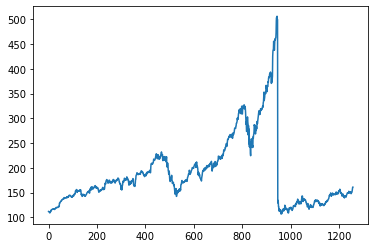

In [19]:
plt.plot(df1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1[:5]

array([[0.01239825],
       [0.01184721],
       [0.0115717 ],
       [0.00921728],
       [0.00663745]])

In [24]:
df1.shape

(1257, 1)

In [25]:
len(df1)

1257

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

In [28]:
print(training_size,test_size)

817 440


In [50]:
training_data=df1[0:training_size,:]

In [51]:
training_data.shape

(817, 1)

In [53]:
test_data=df1[training_size:len(df1),:1]

In [54]:
test_data.shape

(440, 1)

In [55]:
def create_dataset(data,time_step=1):
    dataX=[]
    dataY=[]
    for i in range(len(data)-time_step-1):
        X=data[i:(i+time_step),0]
        dataX.append(X)
        dataY.append(data[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [56]:
time_step=100
X_train,Y_train=create_dataset(training_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [57]:
print(X_train)

[[0.01239825 0.01184721 0.0115717  ... 0.08606137 0.08475892 0.08916719]
 [0.01184721 0.0115717  0.00921728 ... 0.08475892 0.08916719 0.08874139]
 [0.0115717  0.00921728 0.00663745 ... 0.08916719 0.08874139 0.09217282]
 ...
 [0.28047589 0.29337508 0.29492799 ... 0.53139637 0.54296807 0.53465247]
 [0.29337508 0.29492799 0.28082655 ... 0.54296807 0.53465247 0.51649343]
 [0.29492799 0.28082655 0.28548528 ... 0.53465247 0.51649343 0.47924859]]


In [93]:
X_train.shape

(716, 100, 1)

In [58]:
Y_train

array([0.08874139, 0.09217282, 0.094402  , 0.09227301, 0.09254853,
       0.09219787, 0.09953663, 0.101866  , 0.10073889, 0.0994114 ,
       0.10549781, 0.11564183, 0.11809643, 0.116268  , 0.11799624,
       0.12338134, 0.12237946, 0.12180338, 0.10872887, 0.11446462,
       0.11576706, 0.11809643, 0.11762054, 0.11646838, 0.11779587,
       0.11714465, 0.11729493, 0.11501565, 0.11606763, 0.12175329,
       0.11794615, 0.11924859, 0.12155291, 0.12060113, 0.1055479 ,
       0.09663118, 0.09956168, 0.09597996, 0.09380088, 0.08874139,
       0.0989355 , 0.09560426, 0.0977583 , 0.09715717, 0.09878522,
       0.09763306, 0.09239825, 0.09765811, 0.09227301, 0.09312461,
       0.09182217, 0.09329994, 0.08989355, 0.09352536, 0.09572949,
       0.0969067 , 0.09743269, 0.10251722, 0.10569818, 0.10700063,
       0.10830307, 0.11065748, 0.10895429, 0.10877896, 0.11333751,
       0.11496556, 0.11676894, 0.10950532, 0.10685034, 0.10492173,
       0.10822793, 0.12598622, 0.12205385, 0.1241077 , 0.13016

In [59]:
X_test.shape

(339, 100)

In [60]:
Y_test.shape

(339,)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [67]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) #Output layer
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 349ms/step - loss: 0.0201 - val_loss: 0.0239
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0039 - val_loss: 0.0246
Epoch 3/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0016 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 7.9402e-04 - val_loss: 0.0256
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 6.2769e-04 - val_loss: 0.0233
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 5.5120e-04 - val_loss: 0.0209
Epoch 7/100
12/12 [==============================] - 2s 205ms/step - loss: 5.2661e-04 - val_loss: 0.0222
Epoch 8/100
12/12 [==============================] - 2s 207ms/step - loss: 5.2217e-04 - val_loss: 0.0223
Epoch 9/100
12/12 [==============================] - 2s 205ms/step - loss: 5.2344e-04 - val_loss: 0.0214
Epoch 10/100
12/12 [==============================] - 2s 202ms/step

12/12 [==============================] - 2s 199ms/step - loss: 1.9743e-04 - val_loss: 0.0075
Epoch 79/100
12/12 [==============================] - 2s 203ms/step - loss: 2.2847e-04 - val_loss: 0.0088
Epoch 80/100
12/12 [==============================] - 2s 199ms/step - loss: 2.7895e-04 - val_loss: 0.0070
Epoch 81/100
12/12 [==============================] - 2s 202ms/step - loss: 2.6505e-04 - val_loss: 0.0077
Epoch 82/100
12/12 [==============================] - 2s 200ms/step - loss: 2.4939e-04 - val_loss: 0.0068
Epoch 83/100
12/12 [==============================] - 2s 201ms/step - loss: 2.2977e-04 - val_loss: 0.0074
Epoch 84/100
12/12 [==============================] - 2s 200ms/step - loss: 1.9845e-04 - val_loss: 0.0073
Epoch 85/100
12/12 [==============================] - 2s 200ms/step - loss: 1.8271e-04 - val_loss: 0.0070
Epoch 86/100
12/12 [==============================] - 2s 196ms/step - loss: 1.8629e-04 - val_loss: 0.0071
Epoch 87/100
12/12 [==============================] - 2s 20

In [72]:
train_predict=model.predict(X_train)

In [73]:
test_predict=model.predict(X_test)

In [74]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [75]:
test_predict[:5]

array([[381.44046],
       [380.49808],
       [379.2269 ],
       [374.84128],
       [368.12793]], dtype=float32)

In [78]:
scaler.inverse_transform(np.array(Y_test[:5]).reshape(-1,1))

array([[388.  ],
       [389.09],
       [371.38],
       [370.46],
       [379.24]])

In [81]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_train,train_predict)) #Training data RMSE

199.40514246524128

In [82]:
#Test data RMSE
np.sqrt(mean_squared_error(Y_test,test_predict))

181.60963132080113

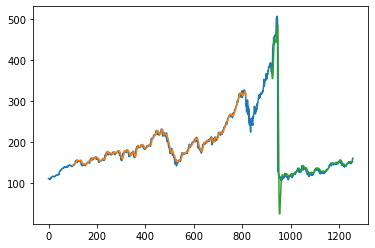

In [106]:
### Plotting 
# shift train predictions for plotting

look_back=100
trainpredictplot=np.empty_like(df1) #Make a new array with the same shape as df1
trainpredictplot[:,:]=np.nan #Fill that array with NaN
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [92]:
len(train_predict)

716

In [107]:
len(test_data)

440

In [108]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [110]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [111]:
temp_input

[0.08295554164057606,
 0.08811521603005634,
 0.09450219160926732,
 0.09117094552285532,
 0.09585472761427677,
 0.09432686286787723,
 0.09718221665623034,
 0.10597370068879147,
 0.10429555416405756,
 0.09906073888541006,
 0.08919223544145266,
 0.09845961177207263,
 0.0965810895428929,
 0.10008766437069505,
 0.10449592986850342,
 0.1055729492798998,
 0.10001252348152784,
 0.0955291170945522,
 0.09718221665623034,
 0.0977332498434565,
 0.09688165309956165,
 0.10149029430181589,
 0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.1248591108328114

In [112]:
#  demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12432145]
101
1 day input [0.08811522 0.09450219 0.09117095 0.09585473 0.09432686 0.09718222
 0.1059737  0.10429555 0.09906074 0.08919224 0.09845961 0.09658109
 0.10008766 0.10449593 0.10557295 0.10001252 0.09552912 0.09718222
 0.09773325 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456
 0.09830933 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795
 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091
 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  

9 day output [[0.14307049]]
10 day input [0.08919224 0.09845961 0.09658109 0.10008766 0.10449593 0.10557295
 0.10001252 0.09552912 0.09718222 0.09773325 0.09688165 0.10149029
 0.10046337 0.10073889 0.09843456 0.09830933 0.09708203 0.09773325
 0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739

 0.14981955 0.1508912  0.15195589 0.15301548]
19 day output [[0.15407133]]
20 day input [0.09688165 0.10149029 0.10046337 0.10073889 0.09843456 0.09830933
 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795 0.10857858
 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091 0.10399499
 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948 0.11724483
 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286 0.10697558
 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954 0.09164684
 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397  0.09014402
 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618
 0.09031935 0.09009393 0.08683782 0.085335   0.09247339 0.09517846
 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.12432145 0.12873

27 day output [[0.1624329]]
28 day input [0.10532248 0.10584847 0.11090795 0.10857858 0.0989856  0.09983719
 0.10356919 0.10737633 0.10715091 0.10399499 0.10194114 0.10459612
 0.11591735 0.11268629 0.11438948 0.11724483 0.11887289 0.12485911
 0.12090169 0.11829681 0.10552286 0.10697558 0.10339386 0.10567314
 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082  0.10016281
 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277 0.08969317
 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935 0.09009393
 0.08683782 0.085335   0.09247339 0.09517846 0.09946149 0.10499687
 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995  0.10522229
 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.12432145 0.12873165 0.13206913 0.13452329 0.13639909 0.13794678
 0.13932481 0.14061704 0.14186092 0.14307049 0.1442508  0.1454045
 0.14653461 0.14764459 

In [113]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [114]:
len(df1)

1257

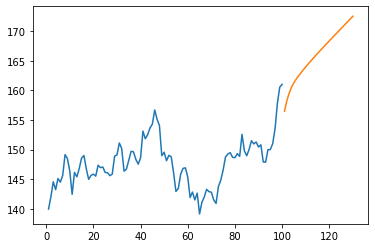

In [115]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

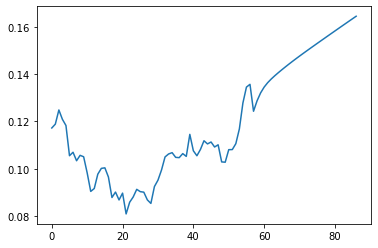

In [116]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [117]:
df3=scaler.inverse_transform(df3).tolist()

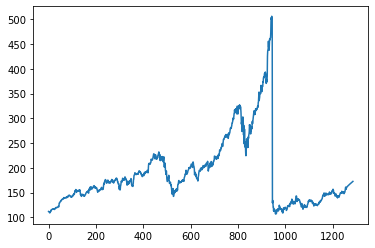

In [118]:
plt.plot(df3)